<a href="https://colab.research.google.com/github/aso1901102/AI_tech2020/blob/master/2020AI0302_detect_mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### OpenCVで人間の顔（正面）を認識する


必要なライブラリのインポート


In [1]:
#画像を表示する為のpyplot
import matplotlib.pyplot as plt
#openCV
import cv2
#webからDLするため
import urllib.request as req

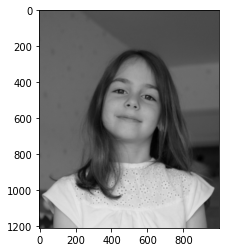

In [2]:
#カスケードファイルをインターネットから取得
#ダウンロードURL
url = "https://github.com/masatokg/book-mlearn-gyomu/raw/master/src/ch3/face/girl.jpg"
#save file name
savefile = "girl.jpg"
#画像をDLして保存
req.urlretrieve(url,savefile)
#プログラムに組み込む
img = cv2.imread(savefile)
#物体を認識する為に白黒（グレースケール）に変換した画像イメージ
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#画像のプロットを表示
plt.imshow(cv2.cvtColor(img_gray,cv2.COLOR_BGR2RGB))
plt.show()

カスケードファイルをDLして物体検出器を作成


In [3]:
#カスケードファイルをDL
#DL元のURL
url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml"
#保存ファイル名
cascade_file = "cascade_file.xml"
#XMLをDLして保存
req.urlretrieve(url,cascade_file)

#カスケードXMLをプログラムに組み込む
cascade = cv2.CascadeClassifier(cascade_file)

### 顔認識を実行して検知リストを取得


In [4]:
# 白黒画像とカスケード物体検出モデルを使って顔認識を実行する
# 引数のminSizeは画像の中で物体として認識する最小サイズ
face_list = cascade.detectMultiScale(img_gray,minSize=(150,150))
# 結果を認識
if len(face_list) == 0:
  print("検出数は0でした")
else:
  print("検出数：",len(face_list),"件")
# if終了

検出数： 1 件


### 検出したエリアに四角形(rectangle)

In [5]:
#　検出した数だけループ（face_listは（x,y,w,h)というタプルの配列リスト）
for(x,y,w,h) in face_list:
  print("顔の座標：x = ", x, "y = ", y, "横幅w = ", w, "縦幅h = ", h)
  #矩形(rectangle)の色ピクセル情報を定義
  #BGRで3色のタプルを定義
  red = (0,0,255)
  #img画像に矩形を追加
  #引数は対象画像、矩形の左上座標、右下座標、色情報、線の細さの順
  cv2.rectangle(img,(x,y),(x+w,y+h),red,thickness = 20)

顔の座標：x =  319 y =  308 横幅w =  405 縦幅h =  405


### 枠線が追加された画像をファイル保存し、画面にも表示

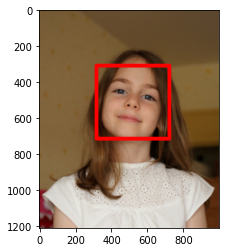

In [6]:
# 矩形が追加された画像データ（img)
cv2.imwrite("face-detect.png",img)
#表示用プロットを作成
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

### 検知したエリアにモザイクをかける

モザイクをかける処理の関数を作る

In [8]:
# モザイクの関数 mosaic
# 引数は対象画像、エリアを表すタプル（左上のx座標、右下のx座標、y座標）、縮小時のサイズ
def mosaic(img,rect,size):
  #モザイク領域を変数に代入
  (x1,y1,x2,y2) = rect
  #横幅を計算
  w = x2 - x1
  #縦幅を計算
  h = y2 - y1
  #画像データを[開始行：終了行、開始列：終了列]で指定して切り抜き
  i_rect = img[y1:y2,x1:x2]
  #切り抜いた画像を指定サイズに縮小してコピー
  i_small = cv2.resize(i_rect,(size,size))
  #縮小したデータを元のサイズに拡大する（ピクセルがつぶれた状態のまま拡大される）
  #interpolationは拡大時にどんなピクセルで補完するかを指定
  i_mos = cv2.resize(i_small,(w,h),interpolation=cv2.INTER_AREA)
  #出来上がったモザイクデータを元の画像に重ねる
  img2 = img.copy()
  #行と列で指定した領域にi_mosを上書き
  img2[y1:y2,x1:x2] = i_mos
  #出来上がったモザイク付きのコピーをリターン
  return img2

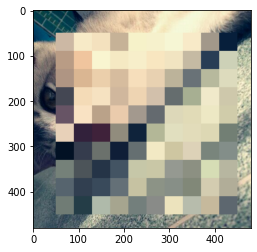

In [9]:
# 猫のがぞうのURL
url = "https://github.com/masatokg/book-mlearn-gyomu/raw/master/src/ch3/face/cat.jpg"
cat_file = "cat.png"
req.urlretrieve(url,cat_file)
#猫の画像データを読み込む
img_cat = cv2.imread(cat_file)
#領域を指定してモザイク
mos = mosaic(img_cat,(50,50,450,450),10)
#モザイク画像を表示
cv2.imwrite("cat-mosaic.png",mos)
plt.imshow(cv2.cvtColor(mos,cv2.COLOR_BGR2RGB))
plt.show()